# File Upload

In [ ]:
from google.colab import files


# train csv file
uploaded = files.upload()
for f in uploaded.keys():
    print('User iploaded file "{name}" with length {length} bytes\n'.format(name = f, length = len(uploaded[f])))

# test csv file
uploaded = files.upload()
for f in uploaded.keys():
    print('User iploaded file "{name}" with length {length} bytes'.format(name = f, length = len(uploaded[f])))

Saving hw2_train.csv to hw2_train.csv
User iploaded file "hw2_train.csv" with length 41330 bytes



Saving hw2_test.csv to hw2_test.csv
User iploaded file "hw2_test.csv" with length 13796 bytes


# Visualization of the train and test data sets

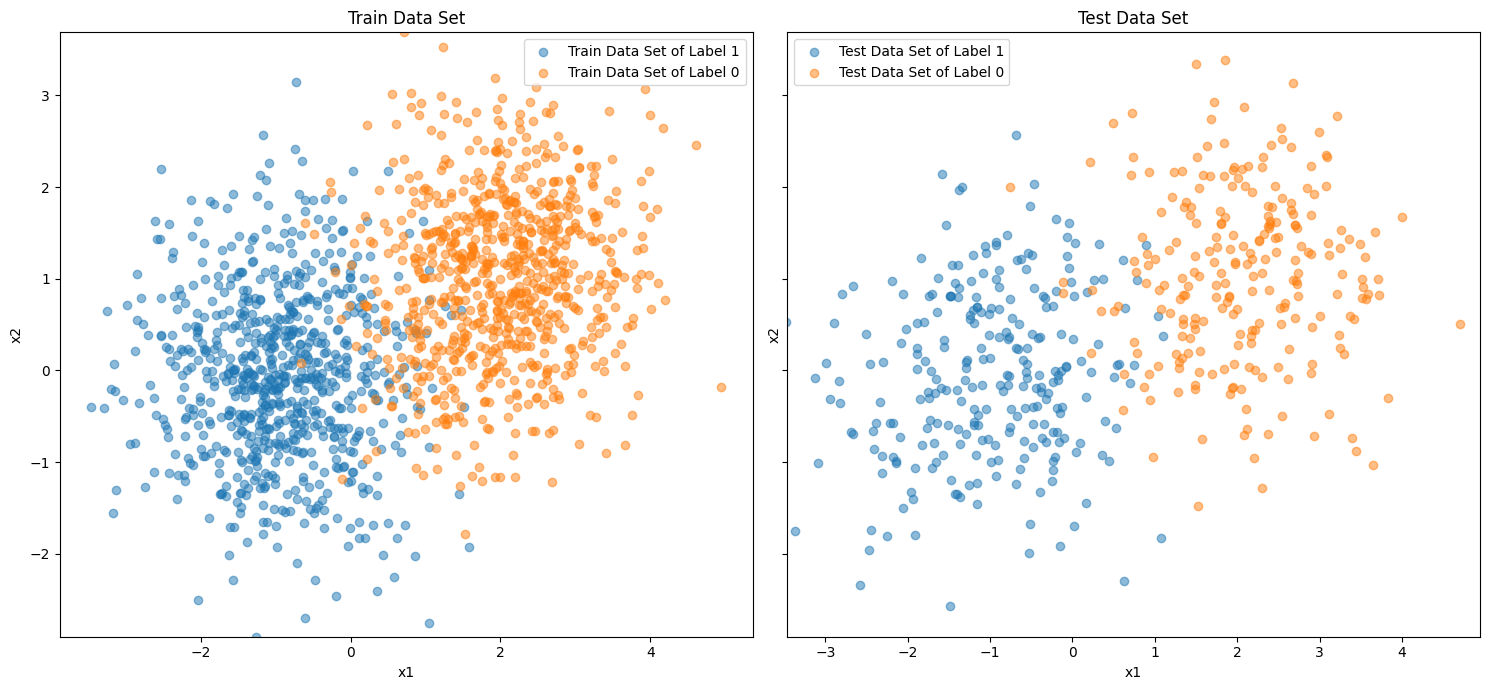

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 7))

train_data = pd.read_csv("./hw2_train.csv")
test_data = pd.read_csv("./hw2_test.csv")

# categorize the train and test data by the label
train_data_0 = train_data[train_data['y'] == 0]
train_data_1 = train_data[train_data['y'] == 1]
test_data_0 = test_data[test_data['y'] == 0]
test_data_1 = test_data[test_data['y'] == 1]

# visualization ofthe train data set
ax1 = plt.subplot(1, 2, 1, title="Train Data Set")
plt.scatter(train_data_1['x1'], train_data_1['x2'], color='tab:blue', alpha=0.5, label="Train Data Set of Label 1")
plt.scatter(train_data_0['x1'], train_data_0['x2'], color='tab:orange', alpha=0.5, label="Train Data Set of Label 0")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
plt.legend()

# visualization of the test data set
ax2 = plt.subplot(1, 2, 2, sharey=ax1, title="Test Data Set")
plt.scatter(test_data_1['x1'], test_data_1['x2'], color='tab:blue', alpha=0.5, label="Test Data Set of Label 1")
plt.scatter(test_data_0['x1'], test_data_0['x2'], color='tab:orange', alpha=0.5, label="Test Data Set of Label 0")
plt.ylim([train_data['x2'].min(), train_data['x2'].max()])
plt.xlim([train_data['x1'].min(), train_data['x1'].max()])
plt.yticks(visible=False)
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
plt.tight_layout()
plt.legend()
plt.show()

# Task 1

## Train a Classifier with Train Data File

### 1. Define the Logistic Regression Class

In [495]:
import numpy as np


class LogisticRegression:
    def __init__(self, learning_rate=0.01, threshold=0.01, max_iterations=50000):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations


    # return the coefficients and intercepts
    def coeff(self):
        return self.w


    # add the intercept
    def add_intercept(self, x_data):
        self.intercept = np.ones((x_data.shape[0], 1))
        return np.concatenate((self.intercept, x_data), axis=1)


    # sigmoid function
    def sigmoid(self, z):
        return 1 /(1 + np.exp(-z))


    # hyperbolic tangent function
    def tanh(self, z):
        return np.tanh(z)
    

    # relu function
    def relu(self, z):
        return np.maximum(0, z)


    # cost function
    def cross_entropy(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


    # train model
    def fit(self, x_data, y_data):
        num_examples, num_features = np.shape(x_data)
        x_data = self.add_intercept(x_data)

        # weight initialization
        self.w = np.zeros(x_data.shape[1])

        for epoch in range(1, self.max_iterations + 1):
            z = np.dot(x_data, self.w)
            h = self.sigmoid(z)

            diff = h - y_data  # difference between the real and predictions
            cost = self.cross_entropy(h, y_data)  # cost calculation by cross entropy function
            gradient = np.dot(x_data.transpose(), diff) / num_examples  # calculate the gradient

            # update the coefficients and intercepts due to the updated gradient
            self.w -= self.learning_rate * gradient

            # if the performance of the model reaches to the threshold, it stops the operation
            if cost < self.threshold:
                return False
            
            # print the status for every 500 iteration
            if epoch % 500 == 0:
                print(f"{epoch}\tb = {self.w[0]}, w1 = {self.w[1]}, w2 = {self.w[2]}, error = {cost}")

        print("----" * 20)
        print(f"{epoch}\tb = {self.w[0]}, w1 = {self.w[1]}, w2 = {self.w[2]}, error = {cost}")
        
    
    # return the predicted result, which is the classification
    def predict(self, x_data, result_round=True):
        x_data = self.add_intercept(x_data)
        if result_round == True:
            return self.sigmoid(np.dot(x_data, self.w)).round()
        else:
            return self.sigmoid(np.dot(x_data, self.w))

    # return the score, which is the accuracy, of the model
    def score(self, x_data, y_data):
        print("Accuracy: ", 100 * len([i for i in range(len(self.predict(x_data))) if self.predict(x_data)[i] == y_data[i]]) / len(y_data), "%")

### 2. Train the Logistic Regression Model

In [496]:
# logistic regression model initialization
model = LogisticRegression()

# logistic regression model training
model.fit(train_data[['x1', 'x2']], train_data['y'])

500	b = 0.2825087157874782, w1 = -1.2399602614136176, w2 = -0.3733570551046049, error = 0.21464119352068292
1000	b = 0.5240013473595501, w1 = -1.6326599649468203, w2 = -0.46537308971510605, error = 0.16923508598796377
1500	b = 0.7061501653649206, w1 = -1.8749215294354398, w2 = -0.5235438313265094, error = 0.149986898047019
2000	b = 0.8506796501433311, w1 = -2.0511171440422555, w2 = -0.5687649968563535, error = 0.13912871907735233
2500	b = 0.9694621294415144, w1 = -2.1899422135302986, w2 = -0.606833641088308, error = 0.13213584527235503
3000	b = 1.0695833673547344, w1 = -2.3046265550133698, w2 = -0.6400984170502549, error = 0.1272656088028268
3500	b = 1.1556065516232563, w1 = -2.402355735014036, w2 = -0.669757331403606, error = 0.12369175125195563
4000	b = 1.2306387989696528, w1 = -2.487468464182098, w2 = -0.696528961195469, error = 0.12096883549154844
4500	b = 1.2968867539558908, w1 = -2.5627889530392616, w2 = -0.720897136781007, error = 0.11883455858995982
5000	b = 1.3559702440675456,

### 3. Visualization of the Logistic Regression Model

+--------+--------------------+--------------------+---------------------+
|        |         b          |         w1         |         w2          |
+--------+--------------------+--------------------+---------------------+
| Task 1 | 2.2520646314290436 | -3.727518082474473 | -1.1338190211502568 |
+--------+--------------------+--------------------+---------------------+

Accuracy:  95.8 %


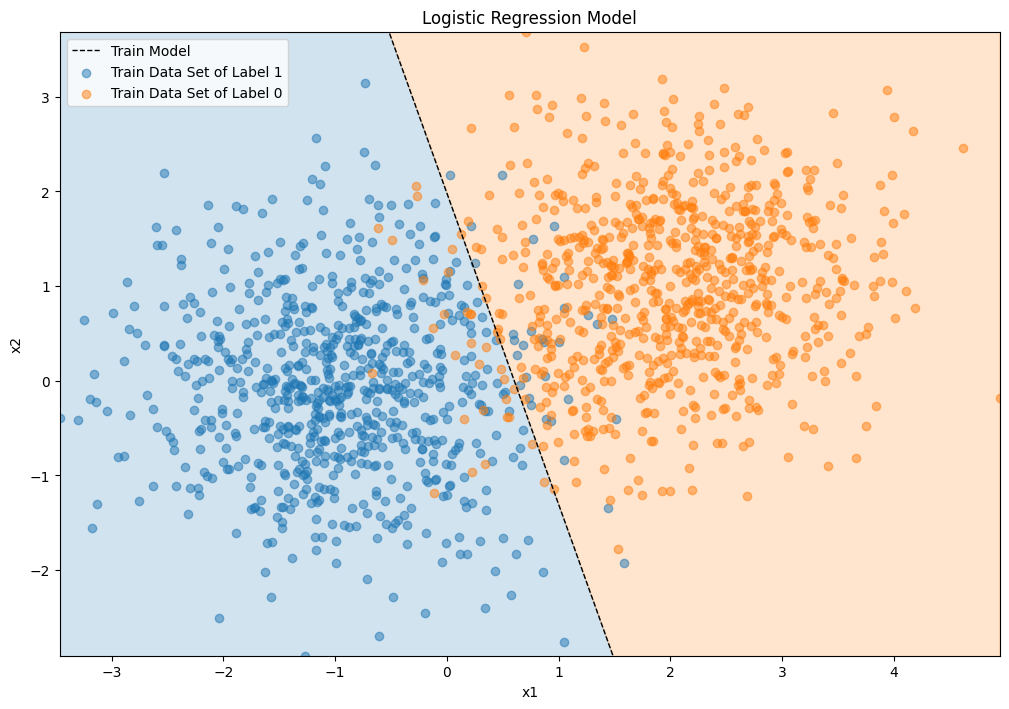

In [497]:
from tabulate import tabulate


# coefficients and intercept
index = ['Task 1']
df = pd.DataFrame({'b'  : model.w[0],
                   'w1' : model.w[1],
                   'w2' : model.w[2]},
                   index=index)
print(tabulate(df, headers='keys', tablefmt='pretty') + '\n')


train_data = pd.read_csv("./hw2_train.csv")
train_data_0 = train_data[train_data['y'] == 0]
train_data_1 = train_data[train_data['y'] == 1]

# initialize the coefficients and intercept
b, w1, w2 = model.w
c, m = -b/w2, -w1/w2
p = m*np.sort((train_data['x1']))+c

# for filling the area
xd = np.array([train_data['x1'].min(), train_data['x1'].max()])
yd = m*xd+c

# visualization ofthe train data set
plt.figure(figsize=(10, 7))
plt.title("Logistic Regression Model")
plt.fill_between(xd, yd, yd.min(), color="tab:blue", alpha=0.2)
plt.fill_between(xd, yd, yd.max(), color="tab:orange", alpha=0.2)
plt.plot(np.sort(train_data['x1']), p, 'k', lw=1, ls='--', label="Train Model")

plt.scatter(train_data_1['x1'], train_data_1['x2'], color='tab:blue', alpha=0.5, label="Train Data Set of Label 1")
plt.scatter(train_data_0['x1'], train_data_0['x2'], color='tab:orange', alpha=0.5, label="Train Data Set of Label 0")
plt.ylim([train_data['x2'].min(), train_data['x2'].max()])
plt.xlim([train_data['x1'].min(), train_data['x1'].max()])
plt.tight_layout()
plt.ylabel("x2")
plt.xlabel("x1")
plt.legend()
plt.plot()

model.score(train_data[['x1', 'x2']], train_data['y'])

# Task 2

## Classify the Data in the Test Data File using the Trained Model

### 1. Visualization of the Classification of Test Data Set by using Logistic Regression Model

+--------+---------------------+
|        |        cost         |
+--------+---------------------+
| Task 1 | 0.10638017088693687 |
| Task 2 | 0.08830015399033474 |
+--------+---------------------+

Accuracy:  96.6 %


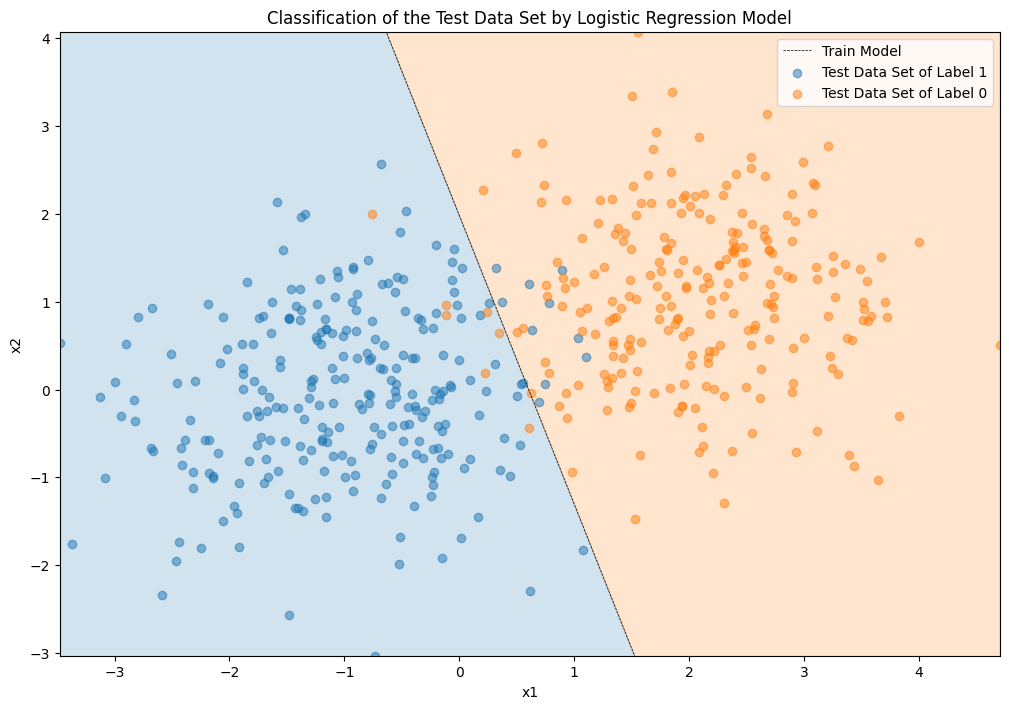

In [498]:
from tabulate import tabulate
from sklearn.metrics import log_loss


test_data = pd.read_csv("./hw2_test.csv")
train_data = pd.read_csv("./hw2_train.csv")

test_data_0 = test_data[test_data['y'] == 0]
test_data_1 = test_data[test_data['y'] == 1]

# initialize the coefficients and intercept
b, w1, w2 = model.w
c, m = -b/w2, -w1/w2
p_train = m*np.sort(train_data['x1'])+c

b, w1, w2 = model.w
c, m = -b/w2, -w1/w2
p_test = m*np.sort(test_data['x1'])+c

# cost of task 1 and task 2
index = ['Task 1', 'Task 2']
df = pd.DataFrame({'cost' : [model.cross_entropy(model.predict(train_data[['x1', 'x2']], False), train_data['y']), model.cross_entropy(model.predict(test_data[['x1', 'x2']], False), test_data['y'])]},
                   index=index)
print(tabulate(df, headers='keys', tablefmt='pretty') + '\n')

# for filling the area
xd = np.array([test_data['x1'].min(), test_data['x1'].max()])
yd = m*xd+c

# visualization ofthe train data set
plt.figure(figsize=(10, 7))
plt.title("Classification of the Test Data Set by Logistic Regression Model")
plt.fill_between(xd, yd, p_test.min(), color="tab:blue", alpha=0.2)
plt.fill_between(xd, yd, p_test.max(), color="tab:orange", alpha=0.2)
plt.plot(np.sort(test_data['x1']), p_test, 'k', lw=0.5, ls='--', label="Train Model")

plt.scatter(test_data_1['x1'], test_data_1['x2'], color='tab:blue', alpha=0.5, label="Test Data Set of Label 1")
plt.scatter(test_data_0['x1'], test_data_0['x2'], color='tab:orange', alpha=0.5, label="Test Data Set of Label 0")
plt.ylim([test_data['x2'].min(), test_data['x2'].max()])
plt.xlim([test_data['x1'].min(), test_data['x1'].max()])
plt.tight_layout()
plt.ylabel("x2")
plt.xlabel("x1")
plt.legend()
plt.plot()

model.score(test_data[['x1', 'x2']], test_data['y'])

### 2. Comparison to the Built-In Model

+--------+-------------------+---------------------+---------------------+
|        |         b         |         w1          |         w2          |
+--------+-------------------+---------------------+---------------------+
| Task 1 | 2.140959712508273 | -3.5290586374816724 | -1.0737958068268487 |
+--------+-------------------+---------------------+---------------------+

+--------+--------------------+
|        |        cost        |
+--------+--------------------+
| Task 1 | 1.450645133599807  |
| Task 2 | 1.1743295917909868 |
+--------+--------------------+

Accuracy:  95.8 %


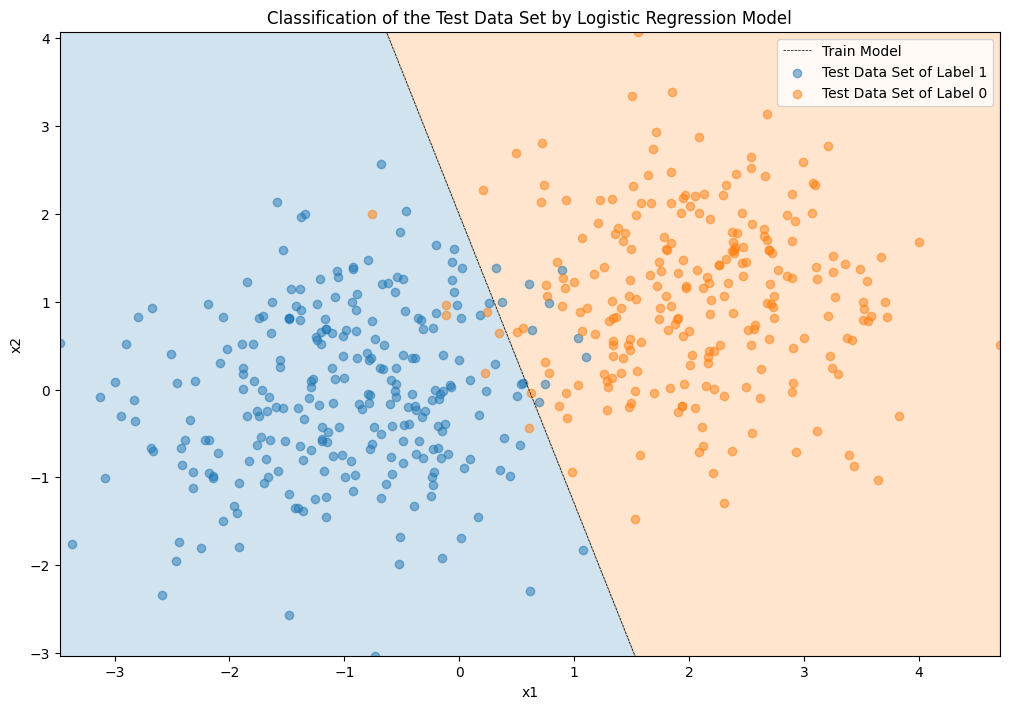

In [499]:
from tabulate import tabulate
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression


# model initialization and prediction
model = LogisticRegression().fit(train_data[['x1', 'x2']], train_data['y'])
p = model.predict(test_data[['x1', 'x2']])


test_data = pd.read_csv("./hw2_test.csv")
train_data = pd.read_csv("./hw2_train.csv")

test_data_0 = test_data[test_data['y'] == 0]
test_data_1 = test_data[test_data['y'] == 1]

# initialize the coefficients and intercept
b = model.intercept_
w1, w2 = model.coef_[0]
c, m = -b/w2, -w1/w2
p_train = m*np.sort(train_data['x1'])+c

b = model.intercept_
w1, w2 = model.coef_[0]
c, m = -b/w2, -w1/w2
p_test = m*np.sort(test_data['x1'])+c

# coefficients and intercept
index = ['Task 1']
df = pd.DataFrame({'b'  : model.intercept_[0],
                   'w1' : model.coef_[0][0],
                   'w2' : model.coef_[0][1]},
                   index=index)
print(tabulate(df, headers='keys', tablefmt='pretty') + '\n')

# cost of task 1 and task 2
index = ['Task 1', 'Task 2']
df = pd.DataFrame({'cost' : [log_loss(train_data['y'], model.predict(train_data[['x1', 'x2']])), log_loss(test_data['y'], model.predict(test_data[['x1', 'x2']]))]},
                   index=index)
print(tabulate(df, headers='keys', tablefmt='pretty') + '\n')

# for filling the area
xd = np.array([test_data['x1'].min(), test_data['x1'].max()])
yd = m*xd+c

# visualization ofthe train data set
plt.figure(figsize=(10, 7))
plt.title("Classification of the Test Data Set by Logistic Regression Model")
plt.fill_between(xd, yd, p_test.min(), color="tab:blue", alpha=0.2)
plt.fill_between(xd, yd, p_test.max(), color="tab:orange", alpha=0.2)
plt.plot(np.sort(test_data['x1']), p_test, 'k', lw=0.5, ls='--', label="Train Model")

plt.scatter(test_data_1['x1'], test_data_1['x2'], color='tab:blue', alpha=0.5, label="Test Data Set of Label 1")
plt.scatter(test_data_0['x1'], test_data_0['x2'], color='tab:orange', alpha=0.5, label="Test Data Set of Label 0")
plt.ylim([test_data['x2'].min(), test_data['x2'].max()])
plt.xlim([test_data['x1'].min(), test_data['x1'].max()])
plt.tight_layout()
plt.ylabel("x2")
plt.xlabel("x1")
plt.legend()
plt.plot()

print("Accuracy: ", model.score(train_data[['x1', 'x2']], train_data['y']) * 100, '%')

# Extra

## Logistic Regression with Polynomial Graph

## Define the Logistic Regression Model for Quadratic Graph

+--------+--------------------+
|        |        cost        |
+--------+--------------------+
| Task 1 | 1.4736715175947008 |
| Task 2 | 1.1743295917909868 |
+--------+--------------------+

Accuracy:  96.6 %


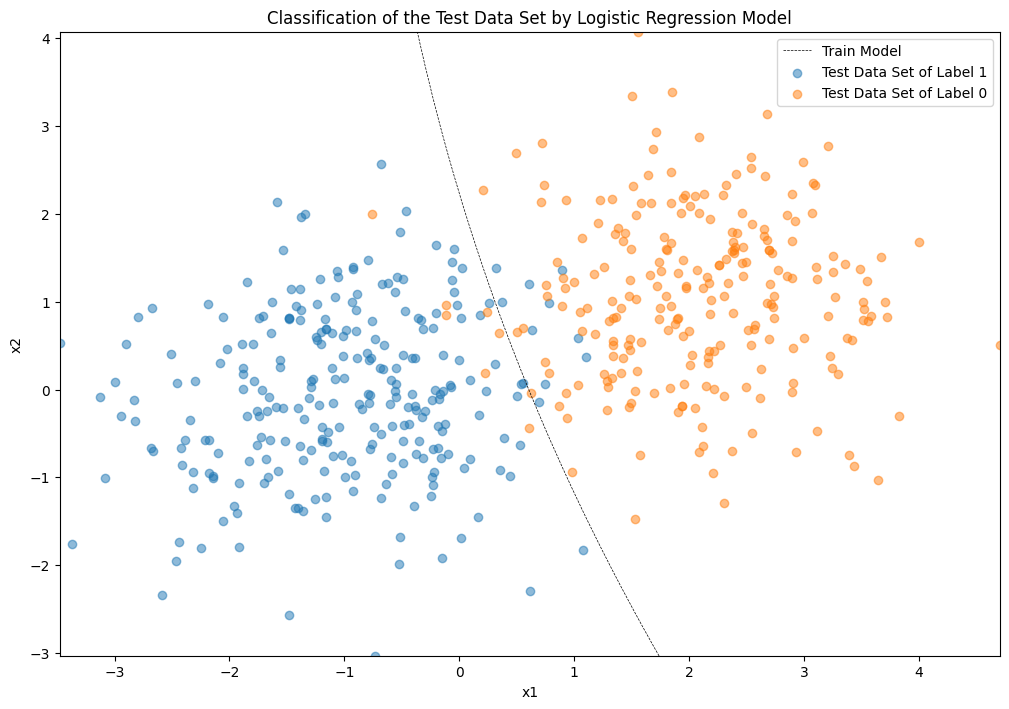

In [500]:
from tabulate import tabulate
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures


test_data = pd.read_csv("./hw2_test.csv")
train_data = pd.read_csv("./hw2_train.csv")

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_poly = poly.fit_transform(train_data[['x1', 'x2']])

model = LogisticRegression()
model.fit(x_poly, train_data['y'])

pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',model)])
pipe.fit(train_data[['x1', 'x2']], train_data['y'])


test_data = pd.read_csv("./hw2_test.csv")
train_data = pd.read_csv("./hw2_train.csv")

test_data_0 = test_data[test_data['y'] == 0]
test_data_1 = test_data[test_data['y'] == 1]

# initialize the coefficients and intercept
x = np.sort(train_data['x1'])
b = model.intercept_[0]
w1, w2, w3, w4, w5 = model.coef_[0]
p_train = -(w2 + w3*x + (w2**2 + 2*w2*w3*x + w3**2*x**2 - 4*w4*w5*x**2 - 4*w1*w5*x - 4*b*w5)**(1/2))/(2*w5)

x = np.sort(test_data['x1'])
b = model.intercept_[0]
w1, w2, w3, w4, w5 = model.coef_[0]
p_test = -(w2 + w3*x + (w2**2 + 2*w2*w3*x + w3**2*x**2 - 4*w4*w5*x**2 - 4*w1*w5*x - 4*b*w5)**(1/2))/(2*w5)

# cost of task 1 and task 2
index = ['Task 1', 'Task 2']
df = pd.DataFrame({'cost' : [log_loss(train_data['y'], pipe.predict(train_data[['x1', 'x2']])), log_loss(test_data['y'], pipe.predict(test_data[['x1', 'x2']]))]},
                   index=index)
print(tabulate(df, headers='keys', tablefmt='pretty') + '\n')

# for filling the area
xd = np.array([test_data['x1'].min(), test_data['x1'].max()])
yd = -(w2 + w3*xd + (w2**2 + 2*w2*w3*xd + w3**2*xd**2 - 4*w4*w5*xd**2 - 4*w1*w5*xd - 4*b*w5)**(1/2))/(2*w5)

# visualization ofthe train data set
plt.figure(figsize=(10, 7))
plt.title("Classification of the Test Data Set by Logistic Regression Model")
plt.fill_between(xd, yd, p_test.min(), color="tab:blue", alpha=0.2)
plt.fill_between(xd, yd, p_test.max(), color="tab:orange", alpha=0.2)
plt.plot(np.sort(test_data['x1']), p_test, 'k', lw=0.5, ls='--', label="Train Model")

plt.scatter(test_data_1['x1'], test_data_1['x2'], color='tab:blue', alpha=0.5, label="Test Data Set of Label 1")
plt.scatter(test_data_0['x1'], test_data_0['x2'], color='tab:orange', alpha=0.5, label="Test Data Set of Label 0")
plt.ylim([test_data['x2'].min(), test_data['x2'].max()])
plt.xlim([test_data['x1'].min(), test_data['x1'].max()])
plt.tight_layout()
plt.ylabel("x2")
plt.xlabel("x1")
plt.legend()
plt.plot()

print("Accuracy: ", pipe.score(test_data[['x1', 'x2']], test_data['y']) * 100, '%')